In [3]:
!pip install MiniSom

In [2]:
import pandas as pd
import itertools
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
import random
import pandas as pd
import glob
import cv2
from itertools import permutations

### Introduction

To tackle the Traveling Salesman Problem (TSP) presented in the provided diagram, we need to find the shortest possible route that visits each city exactly once and returns to the starting city (City 1). The problem involves several steps: enumerating possible paths, calculating distances, and identifying the minimum distance path. Additionally, we aim to implement a solution using Python and explore a sub-optimal solution using Self-Organizing Maps (SOM). Below is a structured approach to solving the problem.

####1. Determine Possible Number of Paths and Optimal Path


Given the graph, we will use a brute-force method to find the shortest path due to the relatively small number of cities (7). The possible paths are permutations of the cities starting from City 1.

**Steps to Determine the Path and Minimum Distance**
1. Enumerate all possible paths starting from City 1.
2. Calculate the total distance for each path.
3. Identify the path with the minimum distance.

The graph can be represented using an adjacency matrix:



In [4]:
# Define the distance matrix
distance_matrix = [
    [0, 12, 10, 0, 0, 0, 12],
    [12, 0, 8, 12, 0, 0, 0],
    [10, 8, 0, 11, 3, 0, 9],
    [0, 12, 11, 0, 11, 10, 0],
    [0, 0, 3, 11, 0, 6, 7],
    [0, 0, 0, 10, 6, 0, 9],
    [12, 0, 9, 0, 7, 9, 0]
]

# List of cities (0-based index)
cities = [1, 2, 3, 4, 5, 6, 7]

# Create a DataFrame
df = pd.DataFrame(distance_matrix, index=cities, columns=cities)

# Display the DataFrame
df


,1,2,3,4,5,6,7
1,0,12,10,0,0,0,12
2,12,0,8,12,0,0,0
3,10,8,0,11,3,0,9
4,0,12,11,0,11,10,0
5,0,0,3,11,0,6,7
6,0,0,0,10,6,0,9
7,12,0,9,0,7,9,0


In [5]:
# Helper function to find all valid paths using DFS
def find_all_paths(matrix, start, visited=None, path=None):
    if visited is None:
        visited = [False] * len(matrix)
    if path is None:
        path = []

    path.append(start)
    visited[start] = True

    paths = []

    # Check if we have visited all cities
    if len(path) == len(matrix):
        if matrix[path[-1]][0] > 0:
            paths.append(path + [0])
    else:
        for i in range(len(matrix)):
            if matrix[start][i] > 0 and not visited[i]:
                new_paths = find_all_paths(matrix, i, visited[:], path[:])
                paths.extend(new_paths)

    path.pop()
    visited[start] = False

    return paths

# Calculate the total distance of a given path
def calculate_distance(path):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += distance_matrix[path[i]][path[i+1]]
    return total_distance

###Possible number of paths to be used by the salesman

In [6]:
# Find all valid paths starting from city 1 (index 0)
all_paths = find_all_paths(distance_matrix, 0)

# Print all possible paths and their distances
print("All possible paths and their distances:")
path_count = 0
for path in all_paths:
    distance = calculate_distance(path)
    # Convert path to 1-based index for output
    path_1_based = [x + 1 for x in path]
    print(f"Path: {path_1_based}, Distance: {distance}")
    path_count += 1

print("")
print(f"\nTotal number of possible paths: {path_count}")

All possible paths and their distances:
Path: [1, 2, 3, 4, 5, 6, 7, 1], Distance: 69
Path: [1, 2, 3, 4, 6, 5, 7, 1], Distance: 66
Path: [1, 2, 3, 5, 4, 6, 7, 1], Distance: 65
Path: [1, 2, 4, 3, 5, 6, 7, 1], Distance: 65
Path: [1, 2, 4, 5, 6, 7, 3, 1], Distance: 69
Path: [1, 2, 4, 6, 5, 3, 7, 1], Distance: 64
Path: [1, 2, 4, 6, 5, 7, 3, 1], Distance: 66
Path: [1, 2, 4, 6, 7, 5, 3, 1], Distance: 63
Path: [1, 3, 2, 4, 5, 6, 7, 1], Distance: 68
Path: [1, 3, 2, 4, 6, 5, 7, 1], Distance: 65
Path: [1, 3, 5, 7, 6, 4, 2, 1], Distance: 63
Path: [1, 3, 7, 5, 6, 4, 2, 1], Distance: 66
Path: [1, 3, 7, 6, 5, 4, 2, 1], Distance: 69
Path: [1, 7, 3, 5, 6, 4, 2, 1], Distance: 64
Path: [1, 7, 5, 6, 4, 2, 3, 1], Distance: 65
Path: [1, 7, 5, 6, 4, 3, 2, 1], Distance: 66
Path: [1, 7, 6, 4, 5, 3, 2, 1], Distance: 65
Path: [1, 7, 6, 5, 3, 4, 2, 1], Distance: 65
Path: [1, 7, 6, 5, 4, 2, 3, 1], Distance: 68
Path: [1, 7, 6, 5, 4, 3, 2, 1], Distance: 69


Total number of possible paths: 20


###The path that will generate the minimum distance travelled.

In [7]:
# Find the shortest valid path
min_distance = float('inf')
optimal_path = []

for path in all_paths:
    current_distance = calculate_distance(path)
    if current_distance < min_distance:
        min_distance = current_distance
        optimal_path = path

# Convert optimal path to 1-based index for output
optimal_path = [x + 1 for x in optimal_path]

# Print the optimal path and the minimum distance
print(f"\nOptimal path: {optimal_path}")


Optimal path: [1, 2, 4, 6, 7, 5, 3, 1]


###The minimum distance travelled

In [8]:
print(f"Minimum distance: {min_distance}")

Minimum distance: 63


# Brute-force Method to Find the Shortest Path:

In [9]:
# Helper function to find all valid paths using DFS
def find_all_paths(matrix, start, path=[]):
    path = path + [start]
    if len(path) == len(matrix):
        if matrix[path[-1]][0] > 0:
            return [path + [0]]
        else:
            return []
    paths = []
    for i in range(len(matrix)):
        if matrix[start][i] > 0 and i not in path:
            newpaths = find_all_paths(matrix, i, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

# Calculate the total distance of a given path
def calculate_distance(path):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += distance_matrix[path[i]][path[i+1]]
    return total_distance

# Find all valid paths starting from city 1 (index 0)
all_paths = find_all_paths(distance_matrix, 0)

# Print all possible paths and their distances
print("All possible paths and their distances:")
for path in all_paths:
    distance = calculate_distance(path)
    # Convert path to 1-based index for output
    path_1_based = [x + 1 for x in path]
    print(f"Path: {path_1_based}, Distance: {distance}")

# Find the shortest valid path
min_distance = float('inf')
optimal_path = []

for path in all_paths:
    current_distance = calculate_distance(path)
    if current_distance < min_distance:
        min_distance = current_distance
        optimal_path = path

# Convert optimal path to 1-based index for output
optimal_path = [x + 1 for x in optimal_path]

# Print the optimal path and the minimum distance
print(f"\nOptimal path: {optimal_path}")
print(f"Minimum distance: {min_distance}")


All possible paths and their distances:
Path: [1, 2, 3, 4, 5, 6, 7, 1], Distance: 69
Path: [1, 2, 3, 4, 6, 5, 7, 1], Distance: 66
Path: [1, 2, 3, 5, 4, 6, 7, 1], Distance: 65
Path: [1, 2, 4, 3, 5, 6, 7, 1], Distance: 65
Path: [1, 2, 4, 5, 6, 7, 3, 1], Distance: 69
Path: [1, 2, 4, 6, 5, 3, 7, 1], Distance: 64
Path: [1, 2, 4, 6, 5, 7, 3, 1], Distance: 66
Path: [1, 2, 4, 6, 7, 5, 3, 1], Distance: 63
Path: [1, 3, 2, 4, 5, 6, 7, 1], Distance: 68
Path: [1, 3, 2, 4, 6, 5, 7, 1], Distance: 65
Path: [1, 3, 5, 7, 6, 4, 2, 1], Distance: 63
Path: [1, 3, 7, 5, 6, 4, 2, 1], Distance: 66
Path: [1, 3, 7, 6, 5, 4, 2, 1], Distance: 69
Path: [1, 7, 3, 5, 6, 4, 2, 1], Distance: 64
Path: [1, 7, 5, 6, 4, 2, 3, 1], Distance: 65
Path: [1, 7, 5, 6, 4, 3, 2, 1], Distance: 66
Path: [1, 7, 6, 4, 5, 3, 2, 1], Distance: 65
Path: [1, 7, 6, 5, 3, 4, 2, 1], Distance: 65
Path: [1, 7, 6, 5, 4, 2, 3, 1], Distance: 68
Path: [1, 7, 6, 5, 4, 3, 2, 1], Distance: 69

Optimal path: [1, 2, 4, 6, 7, 5, 3, 1]
Minimum distance: 63

# Nearest Neighbor Algorithm

In [10]:
def nearest_neighbor_all_paths(distance_matrix, start_city=0):
    num_cities = len(distance_matrix)
    paths = []

    for start_city in range(num_cities):
        visited = [False] * num_cities
        path = [start_city]
        visited[start_city] = True
        current_city = start_city
        total_distance = 0

        for _ in range(num_cities - 1):
            next_city = None
            min_distance = float('inf')

            for city in range(num_cities):
                if not visited[city] and 0 < distance_matrix[current_city][city] < min_distance:
                    min_distance = distance_matrix[current_city][city]
                    next_city = city

            if next_city is None:
                break

            path.append(next_city)
            visited[next_city] = True
            total_distance += min_distance
            current_city = next_city

        total_distance += distance_matrix[current_city][start_city]  # Return to starting city
        path.append(start_city)
        paths.append((path, total_distance))

    return paths

# Get all paths and their distances using the Nearest Neighbor approach
all_paths = nearest_neighbor_all_paths(distance_matrix)

# Print all paths and their distances
print("\nAll Possible Paths and Their Distances:")
for path, distance in all_paths:
    print(f"Path: {[city + 1 for city in path]}, Distance: {distance}")

# Find the best path with the minimum distance
best_path, min_distance = min(all_paths, key=lambda x: x[1])

# Print the best path and the minimum distance
print("\nNearest Neighbor Approach:")
print("Best Path:", [city + 1 for city in best_path])  # Convert 0-based index to 1-based index for cities
print("Minimum Distance:", min_distance)



All Possible Paths and Their Distances:
Path: [1, 3, 5, 6, 7, 1], Distance: 40
Path: [2, 3, 5, 6, 7, 1, 2], Distance: 50
Path: [3, 5, 6, 7, 1, 2, 4, 3], Distance: 65
Path: [4, 6, 5, 3, 2, 1, 7, 4], Distance: 51
Path: [5, 3, 2, 1, 7, 6, 4, 5], Distance: 65
Path: [6, 5, 3, 2, 1, 7, 6], Distance: 50
Path: [7, 5, 3, 2, 1, 7], Distance: 42

Nearest Neighbor Approach:
Best Path: [1, 3, 5, 6, 7, 1]
Minimum Distance: 40


###2. Sub-Optimal Solution using Self-Organizing Maps (SOM)


For a sub-optimal solution, SOM can be employed. The SOM algorithm will map the cities to nodes in a way that attempts to minimize the travel distance iteratively.

Here's a basic implementation outline using Python's MiniSom library:

####Extracting Coordinates from the cities data.

We'll use city coordinates instead of a distance matrix for SOM training.



In [11]:
# Coordinates of the cities (manually derived for visualization purposes)
city_coords = {
    1: [0.0, 0.0],
    2: [0.0, 1.0],
    3: [0.8, 0.5],
    4: [1.0, 1.0],
    5: [0.2, 0.9],
    6: [0.6, 0.6],
    7: [0.7, 0.8]
}

# Define valid connections between cities
valid_connections = {
    1: [2, 3, 7],
    2: [1, 3, 4],
    3: [1, 2, 4, 5, 7],
    4: [2, 3, 5, 6],
    5: [3, 4, 6, 7],
    6: [4, 5, 7],
    7: [1, 3, 5, 6]
}

# Convert the coordinates to a numpy array
city_coords = np.array(list(city_coords.values()))

num_cities = len(city_coords)

pd.DataFrame(city_coords)


# Convert city_coords dictionary to array
#city_coords = np.array([city_coords[i] for i in range(1, num_cities + 1)])


,0,1
0,0.0,0.0
1,0.0,1.0
2,0.8,0.5
3,1.0,1.0
4,0.2,0.9
5,0.6,0.6
6,0.7,0.8


In [12]:
plt.figure(figsize=(10,10))
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.axis([-0.2, 1.2, -0.2, 1.2])
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x1000 with 0 Axes>

###Initialize the SOM
Set up the SOM parameters and initialize it.

In [ ]:
# SOM parameters
som_dimensions = (1, num_cities * 2)  # 1D SOM
iterations = 10000
learning_rate = 0.1
sigma = 1.0

som = MiniSom(som_dimensions[0], som_dimensions[1], 2, sigma=sigma, learning_rate=learning_rate)

som_weights = np.zeros((som_dimensions[0], som_dimensions[1], 2))
som_weights[0, 0] = city_coords[0]  # Set the weight of the first node to the coordinates of city 1
som._weights = som_weights

# Define neighborhood function to enforce valid connections
def neighborhood_function(c, c0, sigma):
    if np.linalg.norm(c - c0) < sigma:
        return 1
    else:
        return 0

/usr/local/lib/python3.10/dist-packages/minisom.py:164: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


###Train the SOM
Train the SOM on the city coordinates.

In [ ]:
# Train the SOM while enforcing valid connections and starting city constraint
for i in range(iterations):
    rand_city = 0
    rand_coord = city_coords[rand_city]
    winner = som.winner(rand_coord)

    for j in range(som_dimensions[0]):
        for k in range(som_dimensions[1]):
            if neighborhood_function(np.array([j, k]), winner, sigma) == 1:
                # Enforce valid connections
                if valid_connections[rand_city + 1] == []:
                    continue
                if k % 2 != 0:
                    valid_indices = [2*(val - 1) for val in valid_connections[rand_city + 1]]
                else:
                    valid_indices = [2*(val - 1) + 1 for val in valid_connections[rand_city + 1]]
                if k not in valid_indices:
                    continue
                som._weights[j, k] += learning_rate * (rand_coord - som._weights[j, k])


###Find the TSP Path
Extract the order of cities from the trained SOM.

In [ ]:
# Extract the SOM node weights
weights = som.get_weights().reshape(-1, 2)

# Find the winning nodes for each city
winning_nodes = [som.winner(city) for city in city_coords]
winning_indices = np.argsort([node[1] for node in winning_nodes])

# Extract the TSP path
tsp_path = city_coords[winning_indices]

In [ ]:
# Convert city coordinates to city indices for the printed path
city_indices = [i for i in range(1, num_cities + 1)]
path_indices = [city_indices[np.where(np.all(city_coords == coord, axis=1))[0][0]] for coord in tsp_path]

# Ensure the path starts and ends at city 1
if path_indices[0] != 1:
    path_indices = [1] + path_indices
if path_indices[-1] != 1:
    path_indices.append(1)
# Print the path
print("TSP Path generated by SOM:", path_indices)

TSP Path generated by SOM: [1, 2, 3, 4, 5, 6, 7, 1]


###Visualize the Solution
Plot the cities and the resulting path.

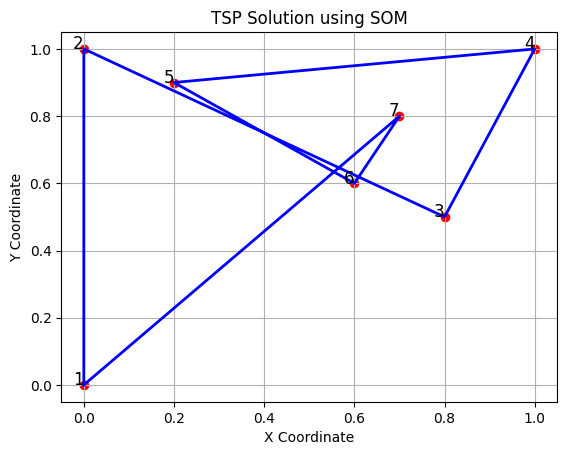

In [ ]:
# Plot the cities
plt.scatter(city_coords[:, 0], city_coords[:, 1], c='red', marker='o')
for i, (x, y) in enumerate(city_coords):
    plt.text(x, y, str(i+1), fontsize=12, ha='right')

# Plot the TSP path
path_coordinates = np.vstack([tsp_path, tsp_path[0]])  # Complete the loop
plt.plot(path_coordinates[:, 0], path_coordinates[:, 1], 'b-', lw=2)
plt.title('TSP Solution using SOM')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.show()


####Visualizing the coordinates data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from itertools import permutations
import pandas as pd
import glob
import cv2

class SOM:
    def __init__(self):
        self.lr = None
        self.size = None
        self.weights = None
        self.lr_const = None
        self.time_const = None
        self.epochs_const = None
        self.neighborhood_prob = None
        self.neighbors_radius_const = None
        print("Created an SOM class object...!")

    @staticmethod
    def find_euclidean_distance(d1: np.array, d2: np.array) -> np.array:
        return np.sqrt(np.sum((d1 - d2) ** 2, axis=1, keepdims=True))

    @staticmethod
    def find_BMU(dist: np.array) -> np.array:
        return np.argmin(dist)

    def update_weights(self, data_point: np.array) -> None:
        self.weights += self.lr * self.neighborhood_prob * (data_point - self.weights)

    def compute_learning_rate(self, current_epoch: int) -> float:
        return self.lr_const * np.exp(-current_epoch / self.epochs_const)

    def compute_neighborhood_size(self, current_epoch: int) -> float:
        return self.neighbors_radius_const * np.exp(-current_epoch / self.time_const)

class SOM_1D(SOM):
    def __init__(self):
        super().__init__()
        self.len = None
        self.BMU = None
        self.dist = None
        self.data = None
        self.weights = None
        self.data_dim = None
        self.data_set = None
        self.save_file = False
        self.save_count = 1
        self.neighborhood_prob = None

        self.N = 50
        self.sample_count = 0.5
        self.lattice = np.arange(self.N)
        self.loop_path = True
        self.random_sample = False
        self.save_file = False
        self.frames = {}
        self.weights_df = None

        self.lr_const = 0.04
        self.epochs_const = 1000
        self.neighbors_radius_const = 0

    def initializer(self, data: np.array) -> None:
        self.len = data.__len__()
        self.N = 50 if 50 > self.len*5 else self.len*5
        self.neighbors_radius_const = self.neighbors_radius_const if self.neighbors_radius_const > 2*self.len else 2*self.len
        self.data_dim = data.shape
        self.data_set = data.copy()

        self.lattice = np.arange(self.N)
        self.weights = np.min(data, axis=0) \
                       + (np.max(data, axis=0) - np.min(data, axis=0)) \
                       * np.random.ranf((self.N, 2))

        self.time_const = self.epochs_const / np.log(self.neighbors_radius_const)
        if self.random_sample:
            idx = np.random.choice(np.arange(self.len), int(self.sample_count * self.len))
            self.data = data[idx]
        else:
            self.data = data.copy()

    def compute_neighborhood_prob(self, index: int, epoch: int) -> np.array:
        sigma = self.compute_neighborhood_size(epoch)
        lateral_dist = abs(self.lattice - index)
        if self.loop_path:
            lateral_dist = np.minimum(lateral_dist, self.N - lateral_dist)
        return np.exp(-lateral_dist ** 2 / (2 * sigma ** 2)).reshape(-1, 1)

    def fit(self) -> None:
        for epoch in range(1, self.epochs_const + 1):
            np.random.shuffle(self.data)
            if epoch < 5 or epoch % self.save_count == 0:
                self.frames[epoch] = self.weights.copy()
            for data_point in self.data:
                self.dist = self.find_euclidean_distance(data_point, self.weights)
                self.BMU = self.find_BMU(self.dist)
                self.neighborhood_prob = self.compute_neighborhood_prob(self.BMU, epoch)
                self.lr = self.compute_learning_rate(epoch)
                self.update_weights(data_point)

        if self.save_file:
            self.weights_df = pd.DataFrame(self.frames)


Created an SOM class object...!
All possible paths and their distances:
Path: [1, 2, 3, 4, 5, 6, 7, 1], Distance: 68
Path: [1, 2, 3, 4, 5, 7, 6, 1], Distance: 57
Path: [1, 2, 3, 4, 6, 5, 7, 1], Distance: 56
Path: [1, 2, 3, 4, 6, 7, 5, 1], Distance: 47
Path: [1, 2, 3, 4, 7, 5, 6, 1], Distance: 44
Path: [1, 2, 3, 4, 7, 6, 5, 1], Distance: 46
Path: [1, 2, 3, 5, 4, 6, 7, 1], Distance: 54
Path: [1, 2, 3, 5, 4, 7, 6, 1], Distance: 42
Path: [1, 2, 3, 5, 6, 4, 7, 1], Distance: 41
Path: [1, 2, 3, 5, 6, 7, 4, 1], Distance: 38
Path: [1, 2, 3, 5, 7, 4, 6, 1], Distance: 30
Path: [1, 2, 3, 5, 7, 6, 4, 1], Distance: 39
Path: [1, 2, 3, 6, 4, 5, 7, 1], Distance: 49
Path: [1, 2, 3, 6, 4, 7, 5, 1], Distance: 27
Path: [1, 2, 3, 6, 5, 4, 7, 1], Distance: 48
Path: [1, 2, 3, 6, 5, 7, 4, 1], Distance: 33
Path: [1, 2, 3, 6, 7, 4, 5, 1], Distance: 39
Path: [1, 2, 3, 6, 7, 5, 4, 1], Distance: 46
Path: [1, 2, 3, 7, 4, 5, 6, 1], Distance: 45
Path: [1, 2, 3, 7, 4, 6, 5, 1], Distance: 35
Path: [1, 2, 3, 7, 5, 4, 6, 

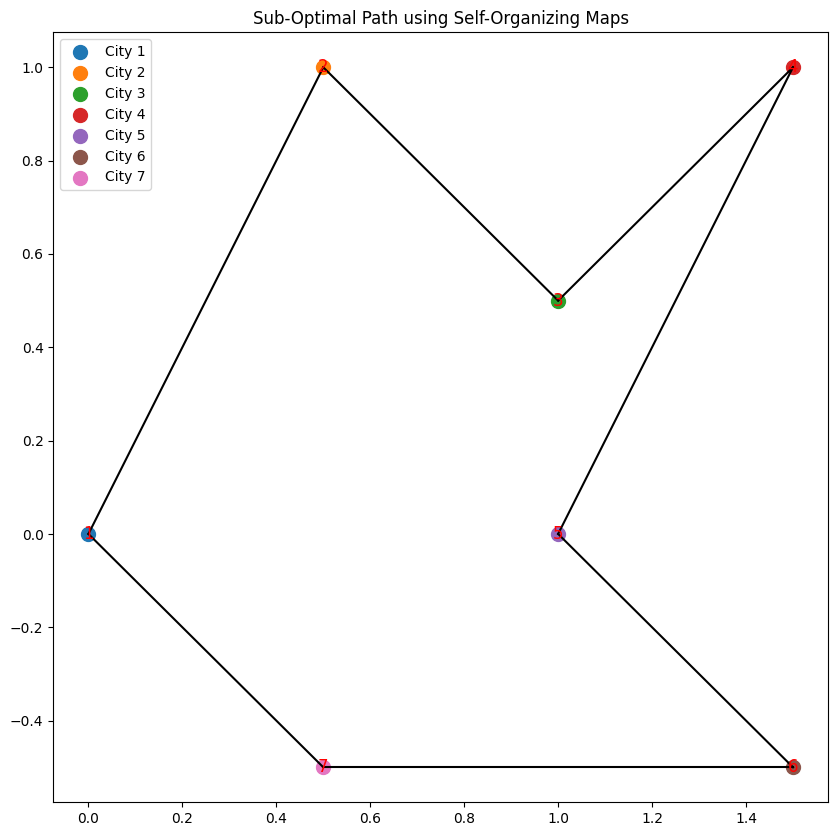

In [ ]:
# Define the distance matrix
distance_matrix = [
    [0, 12, 10, 0, 0, 0, 12],
    [12, 0, 8, 12, 0, 0, 0],
    [10, 8, 0, 11, 3, 0, 9],
    [0, 12, 11, 0, 10, 0, 0],
    [0, 0, 3, 10, 0, 6, 7],
    [0, 0, 0, 0, 6, 0, 9],
    [12, 0, 9, 0, 7, 9, 0]
]

# Pseudo-coordinates derived from the graph structure
city_coords = {
    1: [0.0, 0.0],
    2: [0.5, 1.0],
    3: [1.0, 0.5],
    4: [1.5, 1.0],
    5: [1.0, 0.0],
    6: [1.5, -0.5],
    7: [0.5, -0.5]
}

# Convert the coordinates to a numpy array
data = np.array(list(city_coords.values()))

# Initialize the SOM
som = SOM_1D()
som.initializer(data)
som.fit()

# Function to find the next valid city in the path
def find_next_city(current_city, visited, distance_matrix):
    for i in range(len(distance_matrix[current_city])):
        if distance_matrix[current_city][i] > 0 and i not in visited:
            return i
    return -1

# Construct the path ensuring adjacency
ordered_cities = [1]
current_city = 0
visited = set([current_city])

while len(ordered_cities) < len(city_coords):
    next_city = find_next_city(current_city, visited, distance_matrix)
    if next_city == -1:
        break
    ordered_cities.append(next_city + 1)
    visited.add(next_city)
    current_city = next_city

ordered_cities.append(1)  # Return to the start

# Calculate the total distance for the SOM solution
def calculate_som_distance(path):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += distance_matrix[path[i] - 1][path[i + 1] - 1]
    return total_distance

# Print all possible paths and their distances (for comparison)
print("All possible paths and their distances:")
for perm in permutations(range(2, 8)):  # Fix starting from city 1
    path = [1] + list(perm) + [1]  # Start and end at city 1
    distance = calculate_som_distance(path)
    print(f"Path: {path}, Distance: {distance}")

# Print the sub-optimal path and its distance
som_distance = calculate_som_distance(ordered_cities)
print(f"\nSOM Path: {ordered_cities}")
print(f"SOM Distance: {som_distance}")

# Visualize the SOM solution
plt.figure(figsize=(10, 10))
for i, (x, y) in enumerate(data):
    plt.scatter(x, y, s=100, marker='o', label=f'City {i + 1}')
    plt.text(x, y, f'{i + 1}', fontsize=12, color='red', ha='center', va='center')
for i in range(len(ordered_cities) - 1):
    start_city = city_coords[ordered_cities[i]]
    end_city = city_coords[ordered_cities[i + 1]]
    plt.plot([start_city[0], end_city[0]], [start_city[1], end_city[1]], 'k-')
plt.title('Sub-Optimal Path using Self-Organizing Maps')
plt.legend()
plt.show()


SOM Path: [3, 6, 4, 5, 7, 2, 1, 3]
SOM Distance: 39


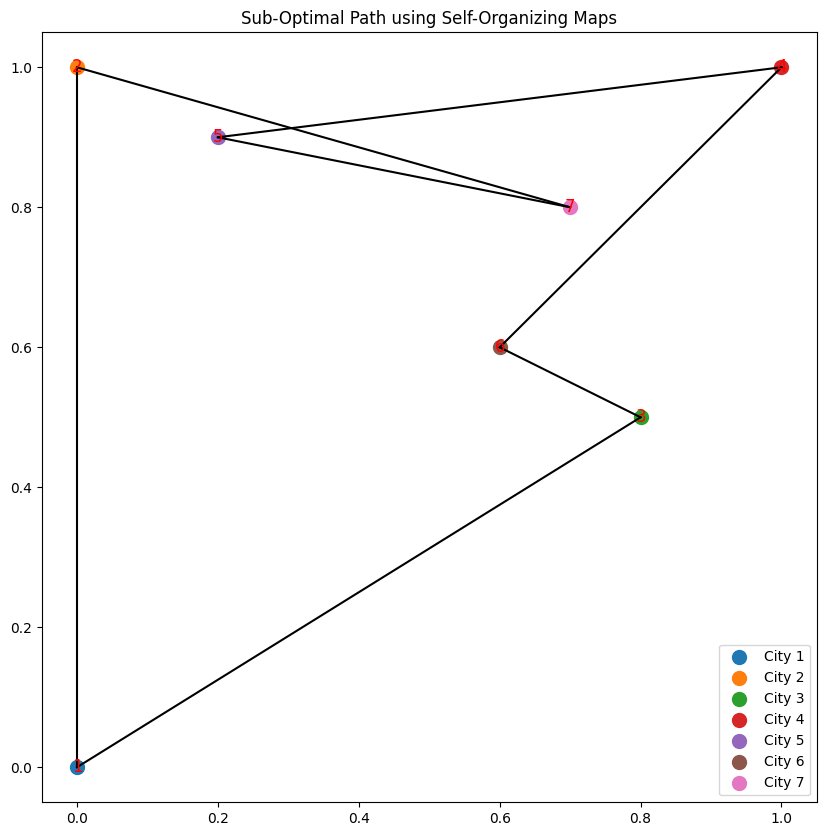

In [ ]:
# Initialize the SOM
som = MiniSom(10, 10, 2, sigma=0.3, learning_rate=0.5)  # Adjusting the grid size for better fitting

# Random initialization and training
som.random_weights_init(data)
som.train_random(data, 1000)  # 1000 iterations

# Get the coordinates of the neurons
nodes = som.get_weights()

# Mapping cities to their best matching units
mapping = {}
for i, x in enumerate(data):
    w = som.winner(x)
    mapping[w] = mapping.get(w, []) + [i + 1]

# Extract the order of cities based on the trained SOM
ordered_cities = []
for x in range(nodes.shape[0]):
    for y in range(nodes.shape[1]):
        if (x, y) in mapping:
            ordered_cities.extend(mapping[(x, y)])

# Adding the start city to the end to complete the cycle
ordered_cities.append(ordered_cities[0])

# Calculate the total distance for the SOM solution
def calculate_som_distance(path):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += distance_matrix[path[i] - 1][path[i + 1] - 1]
    return total_distance

# Print the sub-optimal path and its distance
som_distance = calculate_som_distance(ordered_cities)
print(f"SOM Path: {ordered_cities}")
print(f"SOM Distance: {som_distance}")

# Visualize the SOM solution
plt.figure(figsize=(10, 10))
for i, (x, y) in enumerate(data):
    plt.scatter(x, y, s=100, marker='o', label=f'City {i + 1}')
    plt.text(x, y, f'{i + 1}', fontsize=12, color='red', ha='center', va='center')
for i in range(len(ordered_cities) - 1):
    start_city = city_coords[ordered_cities[i]]
    end_city = city_coords[ordered_cities[i + 1]]
    plt.plot([start_city[0], end_city[0]], [start_city[1], end_city[1]], 'k-')
plt.title('Sub-Optimal Path using Self-Organizing Maps')
plt.legend()
plt.show()
